<div style="border-radius:10px; padding: 15px; background-color:white; font-size:130%; text-align:left">

<h1 align="left"><font color=purple>Transfer Learning with ResNet50: A Comprehensive Guide to Image Classification in PyTorch</font></h1>
    
This Jupyter Notebook is designed to demonstrate the application of transfer learning using the ResNet50 model for image classification tasks. It is structured to be generic, adapting automatically to any set of classes determined by the directory structure of the provided image data. Simply replace the data directory, and the notebook will adjust to the new classes.

The current example uses a vegetable image dataset downloaded from Kaggle, but the methods and code are applicable to any image-based dataset. Here are some key aspects of this notebook:

- **Model Adaptation:** Utilizes a pre-trained ResNet50 model, modifying it by freezing all but the last convolutional block and replacing the final dense layer to accommodate the number of classes inferred from the data directory hierarchy.

- **Dataset Handling:** Demonstrates flexible data loading strategies—either from separate directories for training and validation or from a single root directory with an automatic split. This setup ensures that the notebook can be easily adapted to different image datasets.

- **Diverse Training Approaches:** Showcases three different training methods
  - A stanard PyTorch `training loop`, providing a detailed, step-by-step explanation of each stage of the training process.
  - The use of `ignite`, which abstracts many of the repetitive tasks involved in setting up a training loop, allowing for cleaner and more concise code.
  - `PyTorch Lightning`, which further simplifies the training process, enabling more complex operations to be performed with less code, thereby enhancing code readability and maintenance.

- **Evaluation and Analysis:** After training, the notebook provides tools to evaluate the model's accuracy through a confusion matrix and visualize misclassifications, aiding in understanding and improving model performance.


<div style="text-align: center;">
  <figure>
    <img src="https://github.com/arshadlab/TransferLearning/blob/main/images/transfer_learning_flow.jpg?raw=true" width="1500">
    <figcaption>Figure: Organization of this Notebook</figcaption>
  </figure>
</div>


This notebook is intended for individuals interested in deep learning and computer vision, offering a practical guide on how to leverage pre-trained models for custom image classification tasks. Its flexible design and comprehensive training demonstrations make it a valuable resource for a wide array of image classificaion applications.

<a id="Initialization"></a>
# <p style="background-color: royalblue; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:5px 50px;">Step 1 | Setup and Initialization</p>

<h2 style="color: green;">1.1 - Environment for the Notebook</h2>

The notebook is designed to be flexible and can be run in various environments depending on your needs:

- ## Locally:
    Running this notebook on your local machine is a great option if you have the necessary computational resources and prefer to keep your data and processing in-house. This provides full control over the hardware, software versions, and privacy of your data.  You can run it in Linux, Windows or WSL provided that necessary libraries and toolkits are installed.  For example training on Nvidia GPU will require CUDA toolkit to be installed.

- ## Kaggle:
    [Kaggle](https://www.kaggle.com/) provides a cloud-based Jupyter notebook environment with free access to GPUs and TPUs, which can be especially beneficial for training deep learning models. Kaggle also offers a community and competitions, where you can share your results and learn from others.
    
    
    **(New Notebook) File->Import notebook -> GitHub -> (URL to this [notebook](https://github.com/arshadlab/TransferLearning/blob/main/Transfer%20Learning%20in%20Pytorch%20using%20Resnet.ipynb))**
    
    After importing the notebook, ensure to select one of the **Accelerator/GPU** from the right sidebar.

- ## Google Colab:
    Similar to Kaggle, Google [Colab](https://colab.research.google.com/) offers a cloud-based platform that provides free access to GPUs and TPUs, which can accelerate your computations significantly. Colab is integrated with Google Drive, making it easy to store and manage your notebooks and datasets.
    
    **File->Upload notebook -> GitHub -> (URL to this [notebook](https://github.com/arshadlab/TransferLearning/blob/main/Transfer%20Learning%20in%20Pytorch%20using%20Resnet.ipynb))**
    
    After uploading the notebook, change the runtime to one with a **GPU** by navigating to the menu: Runtime -> Change runtime type.

Using Kaggle and Colab requires a free account, which includes a generous amount of free hours along with access to GPUs. These resources are sufficient for running experiments with the provided notebook.

Each of these platforms has its advantages, whether it's the control and customization of running locally, the community and resources of Kaggle, or the integration and accessibility of Google Colab.

<h2 style="color: green;">1.2 - Downloading Data from Kaggle</h2>

This section describes the steps to download a Kaggle dataset whether you are working locally, on Kaggle's own platform, or using Google Colab.  If you have data already downloaded from some other source or via kaggle website then can skip this section.

### Locally:
1. **Setup Kaggle API:** First, install the Kaggle API by running `pip install kaggle`.
2. **API Key:** Go to your Kaggle account settings, find the API section, and click on "Create New API Token". This downloads a `kaggle.json` file containing your API credentials.
3. **Configure API Key:** Place the `kaggle.json` file in the location `~/.kaggle/kaggle.json` on your machine. Ensure the file has the correct permissions by running `chmod 600 ~/.kaggle/kaggle.json`.
4. **Download Dataset:** Use the Kaggle API command to download the dataset, e.g., `kaggle datasets download -d [dataset-name]`. Unzip the dataset if necessary.

### On Kaggle:
1. **Kaggle Notebook:** When using a Kaggle notebook, the Kaggle API is pre-installed and configured.
2. **Download Dataset:** Directly add the dataset to your Kaggle notebook via the "Add Data" button found on the notebook interface. This will automatically link the dataset to your notebook environment.  It's usually in `/kaggle/input/` path.

### On Google Colab:
Colab notebook usually comes with kaggle package installed. Just in case if it's not then follow below commands
1. **Install Kaggle API:** Similar to the local setup, you need to install the Kaggle API in your Colab notebook using `!pip install kaggle`.
2. **Configure API Key:**
   - Upload your `kaggle.json` file to the Colab environment using the following code snippet:
   ```python
   from google.colab import files
   files.upload()
   - Move the kaggle.json file into the folder .kaggle by running:
       !mkdir ~/.kaggle
       !cp kaggle.json ~/.kaggle/
       !chmod 600 ~/.kaggle/kaggle.json
3. **Download Dataset:** Use the Kaggle API to download the dataset directly into your Colab environment, e.g., !kaggle datasets download -d [dataset-name].


### Download Command
    
    `!kaggle datasets download misrakahmed/vegetable-image-dataset`
    
    `!unzip vegetable-image-dataset.zip`

This section provides a detailed guide on how to download datasets from Kaggle for different types of environments, helping users to start working with data quickly and efficiently.

Some other image based datasets you can try:
 * [**farzadnekouei/trash-type-image-dataset**](https://www.kaggle.com/datasets/farzadnekouei/trash-type-image-dataset)
 * [**marquis03/vehicle-classification**](https://www.kaggle.com/datasets/marquis03/vehicle-classification)


<h2 style="color: green;">1.3 - Install Additional Libraries (Local Setup Only)</h2>

Install required libraries.  This only needed for local machine setup as Kaggle and Colab notebook environments already have them installed. (May need to install ignite and lightning in Colab)

In [ ]:
!pip3 install torch torchvision torchinfo scikit-learn matplotlib seaborn Pillow tqdm pytorch-ignite pytorch-lightning

<h2 style="color: green;">1.4 - Import Libraries</h2>
This cell sets up the essential libraries and configurations for our image classification project using ResNet50 with PyTorch:

- **Basic libraries:** `os`, `numpy` for file and numerical operations.
- **PyTorch ecosystem:** `torch`, `torch.nn`, `torch.optim` for model building and optimization, and `DataLoader` for efficient data handling.
- **Torchvision utilities:** `ImageFolder` for dataset organization, and `transforms` for preprocessing.
- **Learning rate scheduler:** `ReduceLROnPlateau` for optimizing the learning rate during training.
- **Evaluation and visualization tools:** `sklearn.metrics` for model evaluation, and `matplotlib.pyplot`, `seaborn` for plotting graphs and heatmaps.
- **Image processing:** `PIL.Image`, `ImageFile` with a setting to handle truncated images, important for robust data loading.

The setup ensures you have all the necessary tools to start processing data, building, and evaluating your model effciently.


In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import datasets, models, transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageFile
from tqdm import tqdm

# Instructs PIL to ignore the file's completeness and attempt to open it anyway
ImageFile.LOAD_TRUNCATED_IMAGES = True

<a id="Initialization"></a>
# <p style="background-color: royalblue; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:5px 50px;">Step 2 | Data Preparation</p>

<h2 style="color: green;">2.1 - Analyzing Image Data in the Dataset</h2>
Now that we have the dataset downloaded and extracted, let's examine it to collect information about their dimensions and color channels. This analysis is crucial to ensure that all images are uniform, or to identify the need for adjustments before they are fed into the neural network.

In [ ]:
# If running on Kaggle
#root_path='/kaggle/input/vegetable-image-dataset/Vegetable Images'

# Running Locally and assuming zip file contents are extracted in local directory
root_path = './Vegetable Images'

In [ ]:
import os
from PIL import Image

dataset_path = os.path.join(root_path, 'train')
class_types = os.listdir(dataset_path)

# Data structures to store info
image_details = {}

# Iterate over each class type (folder) to process images
for class_type in class_types:
    folder_path = os.path.join(dataset_path, class_type)
    if not os.path.isdir(folder_path):
        continue

    image_files = [f for f in os.listdir(folder_path) if f.endswith(('jpg', 'jpeg', 'png'))]
    num_images = len(image_files)
    format_count = {}
    resolutions = set()
    total_size = 0

    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        try:
            with Image.open(image_path) as img:
                # Collect image details
                dimensions = img.size
                format = img.format
                size = os.path.getsize(image_path)

                # Update data structures
                resolutions.add(dimensions)
                format_count[format] = format_count.get(format, 0) + 1
                total_size += size

        except IOError:
            print(f"Failed to open {image_file}")

    # Calculate and store details for the current class
    average_size_kb = total_size / num_images / 1024 if num_images > 0 else 0
    image_details[class_type] = {
        'count': num_images,
        'average_size_kb': average_size_kb,
        'formats': format_count,
        'resolutions': sorted(resolutions)
    }

# Output the collected information
for class_type, details in image_details.items():
    print(f"\n{class_type} folder contains {details['count']} images.")
    print(f"Average file size: {details['average_size_kb']:.2f} KB")
    print(f"Image formats: {details['formats']}")
    print(f"Resolutions: {details['resolutions']}")

print("\nFinished processing all directories.")
print(f"Total classes found: {len(image_details)}")



Cucumber folder contains 1000 images.
Average file size: 30.54 KB
Image formats: {'JPEG': 1000}
Resolutions: [(224, 224)]

Bottle_Gourd folder contains 1000 images.
Average file size: 15.74 KB
Image formats: {'JPEG': 1000}
Resolutions: [(224, 224)]

Broccoli folder contains 1000 images.
Average file size: 38.13 KB
Image formats: {'JPEG': 1000}
Resolutions: [(224, 224)]

Bean folder contains 1000 images.
Average file size: 29.98 KB
Image formats: {'JPEG': 1000}
Resolutions: [(224, 224)]

Papaya folder contains 1000 images.
Average file size: 15.30 KB
Image formats: {'JPEG': 1000}
Resolutions: [(224, 198), (224, 210), (224, 211), (224, 224)]

Brinjal folder contains 1000 images.
Average file size: 45.20 KB
Image formats: {'JPEG': 1000}
Resolutions: [(224, 224)]

Tomato folder contains 1000 images.
Average file size: 16.36 KB
Image formats: {'JPEG': 1000}
Resolutions: [(224, 224)]

Cauliflower folder contains 1000 images.
Average file size: 40.89 KB
Image formats: {'JPEG': 1000}
Resoluti

<h2 style="color: green;">2.2 - Data Transformations</h2>
The data pipeline preparation given later will require transformations to be setup. We define the transformations for our training and validation datasets to prepare them for the neural network. These transformations are crucial for preparing the data, providing robustness and consistency in model training and evaluation.


In [ ]:
# Define transformations for the training data
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 to ensure consistency in input dimensions
    transforms.RandomRotation(60),  # Randomly rotate images in the range [-60 degrees, 60 degrees]
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally (default probability=0.5)
    transforms.RandomVerticalFlip(),  # Randomly flip images vertically (default probability=0.5)
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Randomly change brightness and contrast
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize tensors using mean and std of ImageNet data
])

# Define transformations for the validation data
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 to match the training set dimensions
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize tensors using the same mean and std as for training
])

<div style="color: Purple; font-size: 48px;"><b>2.3 - Setting up Data Pipeline - Two Scenarios</b></div>

Depending on the organization of your dataset, you can load your data using one of two methods below.  Both of them rely on ImageFolder and DataLoader classes.

<h2 style="color: green;">2.3.1 - Data Loading with ImageFolder and DataLoader</h2>
This section of the notebook sets up the data pipelines for both training and validation datasets using PyTorch's `ImageFolder` and `DataLoader`:

- **ImageFolder:**
  - `ImageFolder` is used to load data where each class is stored in a separate folder. It automatically assigns labels to images based on their folder names, which is ideal for image classification tasks.
  - The data directory paths for training (`train`) and validation (`validation`) are specified, and transformations (`transform`) that preprocess the images are applied when loading.

- **DataLoader:**
  - The `DataLoader` takes the datasets prepared by `ImageFolder` and creates iterable data loaders that provide batches of images to the model during training or evaluation.
  - For the training loader, data is shuffled (`shuffle=True`) to ensure randomization, which helps in reducing model overfitting. The validation loader does not need shuffling.
  - `batch_size` controls the number of images processed at one time, and `num_workers` specifies how many subprocesses to use for data loading, improving loading efficiency.

### Other Dataset Types Supported by PyTorch:

Beyond `ImageFolder`, PyTorch supports several other dataset types for different kinds of data and use cases:

- **TensorDataset:** For wrapping tensors directly into a dataset, allowing you to pass tensors with corresponding labels.
- **Dataset:** A custom abstract class allowing you to implement your own way of organizing data, which you can then pass to a `DataLoader`.
- **ConcatDataset:** Useful for concatenating multiple datasets into one, allowing more complex data setups.
- **Subset:** Allows for creating a subset of a dataset at specified indices, useful for creating split data scenarios other than train-validation like k-fold setups.

These utilities make PyTorch versatile and adaptable for a wide range of machine learning tasks and data types.

The DataLoader in PyTorch does not load all images into memory at the time of its creation. Instead, it loads images as needed during the training process.

Here is a typical DataLoader pipeline in pytorch with ImageFolder at the backend.
<div style="text-align: center;">
  <figure>
    <img src="https://github.com/arshadlab/TransferLearning/blob/main/images/data_loader.jpg?raw=true" width="1500">
    <figcaption>Figure: Pytorch DataLoader Pipeline with Image Data Source</figcaption>
  </figure>
</div>

<div style="color: Purple; font-size: 32px;"><b>2.3.2 - Scenario 1: Separate Directories for Train and Validation Sets</b></div>

Here is train and validation loaders are created

In [ ]:
# Data directories and loading

# Define the root directory for dataset storage
data_dir = root_path

# Load the training dataset
# 'train' should be a subdirectory in your dataset folder containing training images organized by class
train_dataset = ImageFolder(os.path.join(data_dir, 'train'), transform=train_transforms)

# Load the validation dataset
# 'validation' should be a subdirectory in your dataset folder containing validation images organized by class
val_dataset = ImageFolder(os.path.join(data_dir, 'validation'), transform=val_transforms)

# Create a DataLoader for the training dataset
# DataLoader facilitates batch loading of images, shuffling for the training set, and parallel processing using multiple workers.
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=3)

# Here, shuffling is set to False because it's typically not necessary for validation data.
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=3)

# Get the number of classes in the dataset
class_count=len(train_dataset.classes)
print(f'Number of classes found {class_count}')

# Get the class names
class_names = train_dataset.classes
# Print the class names and indices
for i, class_name in enumerate(class_names):
    print(f'Class {i}: {class_name}')

Number of classes found 15


This setup uses the transformations defined earlier to preprocess the images and uses a DataLoader to handle batching, shuffling, and parallel loading using multiple workers.

<div style="color: Purple; font-size: 32px;"><b>2.3.3 - Scenario 2: Single Root Directory with Splitting</b></div>

If all your image class folders are in a single root directory and you need to programmatically split them into training and validation sets, you can use the following method.

First imports necessary libraries, loads an image dataset from a specified directory, and splits the data into training and validation subsets using train_test_split. Indices for the split are generated based on the dataset's targets, ensuring a stratified distribution. The subsets are then wrapped into Subset objects, which are further encapsulated by a custom TransformingDataset class that allows for the application of transformations to the images. Finally, DataLoader objects are created for both the training and validation datasets to facilitate efficient data loading during model training.

In [ ]:
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split

# Set the directory for dataset.  Let's use 'train' directory as our single source
data_dir=os.path.join(root_path, 'train')
# Load images using ImageFolder, which assumes images are organized in a directory by class
dataset = ImageFolder(root=data_dir)

# Generate indices: split the data into train and validation
train_idx, val_idx = train_test_split(
    np.arange(len(dataset.targets)),
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify=dataset.targets
)

# Count of unique classes in the dataset
class_count=len(dataset.classes)
print(f'Number of classes found {class_count}')
# Create Subset objects for train and validation
train_dataset = Subset(dataset, train_idx)
val_dataset = Subset(dataset, val_idx)

# Define a custom dataset class to apply transformations dynamically
class TransformingDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.classes = dataset.dataset.classes
        self.transform = transform

    def __len__(self):
        # Return the number of items in the dataset
        return len(self.dataset)

    def __getitem__(self, idx):
        # Fetch the image and label at the given index
        image, label = self.dataset[idx]
        # Apply transformation if any
        if self.transform:
            image = self.transform(image)
        return image, label

# Apply transforms using the custom dataset wrapper
train_dataset = TransformingDataset(train_dataset, transform=train_transforms)
val_dataset = TransformingDataset(val_dataset, transform=val_transforms)

# Initialize DataLoader for both training and validation datasets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=3)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=3)

Both approaches effectively prepare your datasets for training and validation, ensuring your model can generalize effectively to new, unseen data. The **`train_loader`** and **`val_loader`** abstract all the data preparation logic and are used by the training loop to fetch data.

<a id="Initialization"></a>
# <p style="background-color: royalblue; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:5px 50px;">Step 3 | Model Preparation</p>

<h1 style="color: green;">3.1 - Custom ResNet50 Class for Transfer Learning</h1>
We will be using ResNet50 as our base model, aiming to leverage all the training and learning already incorporated into it. We will freeze all the layers from the original model to continue using their weights, except for the last convolution block and the newly added dense layer, which will be trained on the new dataset.

The code defines a custom version of the ResNet50 model tailored for a specific number of classes, suitable for transfer learning. It starts by loading a pretrained ResNet50 model and removes the last two layers to customize the output. It then freezes all the pretrained layers except for the last convolutional block to retain learned features while only updating the final sections of the network during training. New layers added include an adaptive average pooling layer, a dropout layer for regularization, and a fully connected layer that outputs predictions for the specified number of classes. The forward method details the path the input takes through the model, ending with a dropout and a dense layer that produces the final class predictions.

<div style="text-align: center;"><img src="https://github.com/arshadlab/TransferLearning/blob/main/images/resnet50.jpg?raw=true" width="1000"></div>

In [ ]:
# Define a custom model class that extends nn.Module
class CustomResNet(nn.Module):
    def __init__(self, num_classes, pretrained=True):
        super().__init__() # Initialize the superclass (nn.Module)

        weights = None
        if pretrained == True:
            weights = models.ResNet50_Weights.DEFAULT

        # Load a pre-trained ResNet50 model
        base_model = models.resnet50(weights=weights) #pretrained=True)

        # Remove last two layers. e.g Avg Pooling and Dense Layer
        self.base_model = nn.Sequential(*list(base_model.children())[:-2])


        # Freeze the parameters of all layers except the last convolutional block (e.g Conv block 4)
        # This helps in transferring learned features without altering them in the initial training phase
        if pretrained == True:
            for child in list(self.base_model.children())[:-1]:
                for param in child.parameters():
                    param.requires_grad = False # Set requires_grad to False to freeze parameters

        # Define an adaptive average pooling layer to resize the output of the convolutions to (1, 1)
        self.global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))

        # Define a dropout layer for regularization to prevent overfitting
        self.dropout = nn.Dropout(0.5)

        # Get the number of output features from the last convolutional layer
        in_f=base_model.fc.in_features

        # Replace the last fully connected layer with a new one that matches the number of classes
        self.fc = nn.Linear(in_f, num_classes)

    def forward(self, x):
        # Pass input through the base model
        x = self.base_model(x)
        # Apply global average pooling
        x = self.global_avg_pool(x)
        # Flatten the output for the fully connected layer
        x = torch.flatten(x, 1)
        # Apply dropout
        x = self.dropout(x)
        # Final Dense layer
        x = self.fc(x)
        return x

<h1 style="color: green;">3.2 - Model Initialization and Device Setup</h1>
Configure computing device and initializes the custom ResNet model.

In [ ]:
# Let's create the model here to view the summary in subsequent cell.
# The same instance will be used by standard loop and ignite methods.  Lightning will create it's own model instance
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomResNet(class_count).to(device)


<h1 style="color: green;">3.3 - Model Summary with Torchinfo</h1>

In [ ]:
#!pip install torchinfo
from torchinfo import summary
summary(model, input_size=(1,3,224, 224), row_settings = ("depth","var_names",))

Layer (type (var_name):depth-idx)                       Output Shape              Param #
CustomResNet (CustomResNet)                             [1, 15]                   --
├─Sequential (base_model): 1-1                          [1, 2048, 7, 7]           --
│    └─Conv2d (0): 2-1                                  [1, 64, 112, 112]         (9,408)
│    └─BatchNorm2d (1): 2-2                             [1, 64, 112, 112]         (128)
│    └─ReLU (2): 2-3                                    [1, 64, 112, 112]         --
│    └─MaxPool2d (3): 2-4                               [1, 64, 56, 56]           --
│    └─Sequential (4): 2-5                              [1, 256, 56, 56]          --
│    │    └─Bottleneck (0): 3-1                         [1, 256, 56, 56]          (75,008)
│    │    └─Bottleneck (1): 3-2                         [1, 256, 56, 56]          (70,400)
│    │    └─Bottleneck (2): 3-3                         [1, 256, 56, 56]          (70,400)
│    └─Sequential (5): 2-6        

## Understanding the Model Summary Output

The output from the `torchinfo` summary provides crucial insights into the model's structure:

- The total number of parameters in the model are `23,538,767`. It includes both trainable and non-trainable parameters. Parameters are elements of the model that are learned from the training data, and having a large number of parameters often indicates a more complex model capable of learning finer details in the data.

- The trainable parameters are `14,995,471`. These are the parameters that will be updated during training. In this custom model, not all parameters are trainable because we froze some of the layers (as discussed earlier) to retain the knowledge they gained from pre-training on a large dataset (like ImageNet). Only the parameters in the unfrozen layers and the newly added layers (like the final dense layer) will be adjusted.

The distinction between total and trainable parameters helps you understand the model's capacity and how much of it is being fine-tuned. It's important for managing computational resources and for tuning the model to strike a balance between performance and efficiency.


<a id="Initialization"></a>
# <p style="background-color: royalblue; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:5px 50px;">Step 4 | Model Training</p>

<div style="color: Purple; font-size: 48px;"><b>4.1 - Overview of Different Ways of Training in PyTorch</b></div>
In this section of the notebook, we will explore three distinct approaches to training models in PyTorch, each offering different levels of abstraction and convenience. Understanding these methods will help you choose the most appropriate one for your specific needs, whether you prioritize control over the training loop, ease of use, or scalability.

- **Standard Training Loop:** The first method we will examine is the traditional way of using PyTorch to train models. This approach involves manually coding the training loop, where you explicitly handle the forward pass, loss computation, backpropagation, and updating model parameters. This method gives you maximum control over the training process and is ideal for scenarios where customization and fine-grained control are necessary.

- **Using Ignite:** The second approach leverages the Ignite library, an extension to PyTorch that abstracts common training routines into more manageable, higher-level components. Ignite helps you organize your code and reduce boilerplate while still allowing flexibility where needed. It provides a cleaner and more modular approach, which is useful for maintaining and scaling complex training workflows.

- **Using Lightning:** The third method utilizes PyTorch Lightning, which abstracts and automates much of the boilerplate training code required in standard PyTorch. It aims to decouple the research code from the engineering code, making the codebase cleaner, more maintainable, and easier to share with others. Lightning is particularly beneficial for researchers aiming to reduce the amount of code they need to write without sacrificing the functionality and scalability of their models.

By comparing these approaches, we aim to provide a comprehensive view of how PyTorch can be used in various scenarios, from straightforward projects to complex research endeavors.


<div style="color: Purple; font-size: 32px;"><b>4.2 - Approach 1: Standard Training and Validation Loop</b></div>

This function, `train_and_validate`, manages the entire training and validation process for the specified number of epochs. It includes mechanisms for training the model, validating its performance, and applying early stopping if necessary.

- **Early Stopping Initialization:**
  - An instance of `EarlyStoppingCustom` is created to monitor the validation loss and stop training if there hasn't been an improvement for 15 epochs.

- **Training Process:**
  - The model is set to training mode (`model.train()`). For each epoch, the function processes batches of data, computes the loss, performs backpropagation, and updates the model parameters.
  - Training loss and accuracy for each batch are calculated and displayed using a progress bar (`tqdm`). After each epoch, the scheduler adjusts the learning rate based on the average training loss.

- **Validation Process:**
  - The model is switched to evaluation mode (`model.eval()`) to disable dropout and batch normalization during the validation phase.
  - Loss and accuracy are computed for the validation set. The results are stored and printed out for each epoch, allowing you to monitor the model's performance over time.

- **Early Stopping Check:**
  - After each validation, the early stopping mechanism checks if there has been an improvement. If the model's performance hasn't improved for the specified number of epochs, training is halted, and a message is printed indicating that early stopping has been triggered.

- **Output:**
  - The function returns a history dictionary containing lists of training and validation losses and accuracies. This data is useful for plotting and analyzing the training process.

This setup ensures that the model is trained efficiently, with feedback on its performance and mechanisms to prevent overfitting.


In [ ]:
# Define a custom class for early stopping to prevent overfitting during training
class EarlyStoppingCustom:
    def __init__(self, patience=15, verbose=True, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Initializes the early stopping mechanism.
        Args:
            patience (int): How many epochs to wait after last time validation loss improved.
                            Default: 15
            verbose (bool): If True, prints a message for each validation loss improvement.
                            Default: True
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                           Default: 0
            path (str): Path for the checkpoint to be saved to.
                        Default: 'checkpoint.pt'
            trace_func (function): Trace function to print out the state, defaults to print.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0  # Counter to keep track of the number of epochs without improvement
        self.best_score = float('inf')  # Initialize with inf so any score is better initially
        self.early_stop = False         # Indicator whether to stop the training
        self.path = path                # Path to save the model file
        self.trace_func = trace_func    # Function to output messages
        self.delta = delta              # Minimum change to qualify as an improvement

    def __call__(self, val_loss, model):

        # If the new validation loss is less than the best score (improvement)
        if self.best_score == None or val_loss < self.best_score:
            self.best_score = val_loss
            self.save_checkpoint(val_loss, model) # Save the model as a checkpoint
            self.counter = 0 # Reset the counter

        # If the new validation loss is not better than the best score plus delta
        elif val_loss > self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                # Output the current state of the early stopping
                self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                # If the counter exceeds patience, set to stop training
                self.early_stop = True

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            self.trace_func(f'Validation loss decreased: {val_loss:.4f}. Saving model to {self.path}')
        torch.save(model.state_dict(), self.path)


In [ ]:
def train_and_validate(model, device, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs):
    # Initialize early stopping with a patience of 15 epochs
    early_stopping = EarlyStoppingCustom(patience=15, verbose=True, path='best_model.pt')

    # Initialize history dictionary to keep track of loss and accuracy metrics
    history = {'train_loss': [], 'train_accuracy': [], 'val_loss': [], 'val_accuracy': []}
    for epoch in range(num_epochs):
        model.train() # Set model to training mode
        total_loss, total_correct, total_images = 0, 0, 0
        with torch.set_grad_enabled(True):
            data_bar = tqdm(train_loader, desc="Train", position=0, leave=True) # Progress bar for training
            for inputs, labels in data_bar:
                inputs, labels = inputs.to(device), labels.to(device)  # Move data to the specified device

                optimizer.zero_grad()  # Clear gradients
                outputs = model(inputs) # Forward pass
                loss = criterion(outputs, labels)  # Compute loss
                loss.backward() # Backward pass
                optimizer.step() # Update model parameters

                # Calculate total loss and accuracy for the epoch
                total_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                total_correct += (predicted == labels).sum().item()
                total_images += labels.size(0)

                # Update progress bar with current loss and accuracy
                data_bar.set_postfix(loss=(total_loss/total_images), accuracy=total_correct/total_images)

        history['train_loss'].append(total_loss / total_images)
        history['train_accuracy'].append(total_correct / total_images)
        training_loss = total_loss / total_images

        # Step the learning rate scheduler
        scheduler.step(training_loss)

        # Check if early stopping is triggered
        early_stopping(training_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break

        # Validation phase
        total_loss, total_correct, total_images = 0, 0, 0
        model.eval() # Set model to evaluation mode
        with torch.no_grad():
            data_bar = tqdm(val_loader, desc="Val  ", position=0, leave=True)
            for inputs, labels in data_bar:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                # Calculate total validation loss and accuracy
                total_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                total_correct += (predicted == labels).sum().item()
                total_images += labels.size(0)
                data_bar.set_postfix(loss=(total_loss/total_images), accuracy=total_correct/total_images)

        # Store the average validation loss and accuracy for this epoch in the history
        history['val_loss'].append(total_loss / total_images)
        history['val_accuracy'].append(total_correct / total_images)
         # Print summary of the epoch
        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss: {history['train_loss'][-1]:.4f}, Train Acc: {history['train_accuracy'][-1]:.4f}, Val Loss: {history['val_loss'][-1]:.4f}, Val Acc: {history['val_accuracy'][-1]:.4f}")

    return history

<h1 style="color: green;">4.2.1 - Setting Up Training Parameters</h1>

This cell configures the essential components for training the model:

- **Loss Function:**
  - `criterion = nn.CrossEntropyLoss()`
  - This function measures how well the model's output matches the actual labels. Cross-entropy loss is commonly used for classification tasks because it penalizes incorrect classifications.

- **Optimizer:**
  - `optimizer = optim.Adam(model.parameters(), lr=0.0001)`
  - Adam optimizer is used here, known for combining the advantages of two other extensions of stochastic gradient descent. Specifically, it computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients. The learning rate is initially set to 0.0001.

- **Learning Rate Scheduler:**
  - `scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, min_lr=0.00001)`
  - This scheduler reduces the learning rate when a metric has stopped improving, which in this case is configured to monitor the loss (mode set to 'min'). The learning rate is reduced by a factor of 0.5 if there's no improvement in the loss for 5 consecutive epochs, with a lower bound set at 0.00001.

The optimizer created here will be used in standard loop and by ignite.  These components are critical for guiding the training process, managing how the model weights are updated in response to the training data, and ensuring that the model learns effectvely over time.

In [ ]:
# Training setup
# Must need to rerun this cell if model instance is recreated
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, min_lr=0.00001)

<h1 style="color: green;">4.2.2 - Triggering Training Loop</h1>
Now initiates the training and validation process by calling the `train_and_validate` function with the necessary parameters:

In [ ]:
history = train_and_validate(model, device, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=1)

Train: 100%|███████████████████████████████████████████████| 469/469 [00:42<00:00, 11.15it/s, accuracy=0.959, loss=0.18]


Validation loss decreased: 0.1805. Saving model to best_model.pt


Val  : 100%|██████████████████████████████████████████████| 94/94 [00:06<00:00, 14.45it/s, accuracy=0.997, loss=0.00933]

Epoch 1/1: Train Loss: 0.1805, Train Acc: 0.9586, Val Loss: 0.0093, Val Acc: 0.9973


<div style="color: Purple; font-size: 32px;"><b>4.3 - Approach 2: Training Setup with Ignite</b></div>

[PyTorch Ignite](https://pytorch.org/ignite/) is a high-level library that helps in writing compact and more readable PyTorch code. Developed by the PyTorch team, Ignite assists in automating routine tasks involved in training machine learning models, such as handling epochs, setting up the training loop, and managing validation. It provides a cleaner API for core training operations using events and handlers, which allows developers to focus more on the model and training logic rather than on the boilerplate code. Ignite also facilitates more structured code that is easier to debug, extend, and maintain. Common use cases include complex training loops, logging, metrics calculation, and early stopping, making it a powerful tool for efficient and effective model development.

<h2 style="color: green;">4.3.1 - Key Components in PyTorch Ignite</h2>
PyTorch Ignite is designed to simplify the boilerplate code in your machine learning projects while providing a high level of abstraction and modularity. Here are some of the core components that Ignite offers to streamline model training and evaluation:

- **`Engine`:** At the heart of Ignite is the `Engine`, which is responsible for running a given process over each batch of data. It abstracts the loop, allowing users to focus on the forward pass and the loss calculation without worrying about the epoch and iteration control.

- **`Events`:** The `Engine` allows you to attach handlers to a variety of events during the training and evaluation process, such as `STARTED`, `COMPLETED`, and `ITERATION_COMPLETED`. This feature facilitates customization and extends functionality through event-driven programming.

- **`Handlers`:** These are functions (or callable objects) that you can attach to the `Engine` to be executed during the training loop. Handlers can be used for logging, saving models, early stopping, and adjusting the learning rate, among other tasks.

- **`Metrics`:** Ignite provides several out-of-the-box metrics like accuracy, precision, recall, and confusion matrix that can be easily added to your training or evaluation engines. Metrics are computed over the entire epoch and are updated after each iteration, providing comprehensive monitoring of model performance.

- **`Trainer` and `Evaluator`:** Although not distinct classes within Ignite, these are conceptual roles that an `Engine` can take. A `Trainer` Engine processes batches of data to update model parameters, while an `Evaluator` Engine typically runs inference on validation or test data to compute metrics.

These components work together to provide a flexible and powerful framework for automating the routine tasks in machine learning pipelines, enabling developers to construct and manage training workflows with greater ease and clarity.


This cell configures the model training and evaluation using the `ignite` library, which provides a high-level interface for organizing training processes in PyTorch:

- **Importing Ignite Components:**
  - Essential components from `ignite` such as `Events`, `create_supervised_trainer`, `create_supervised_evaluator`, and various handlers and metrics are imported to facilitate the training and evaluation setup.

- **Trainer and Evaluator Configuration:**
  - `trainer` is created using `create_supervised_trainer` which automates the training loop, handling the forwarding, loss calculation, and backward pass.
  - `evaluator` is configured with `create_supervised_evaluator` to assess the model using metrics such as accuracy and loss on the validation dataset.

- **Logging and Callbacks:**
  - Custom logging functions are attached to `trainer` and `evaluator` to log metrics at the end of each epoch.
  - Commented-out lines hint at potential prints for average accuracy and loss, which can be uncommented for detailed logs during training and validation.

- **Model Checkpointing and Early Stopping:**
  - `ModelCheckpoint` is configured to save the model periodically, ensuring that the best-performing models are stored.
  - `EarlyStopping` is set up to monitor accuracy and halt training if there hasn't been an improvement, demonstrating how to use custom score functions for stopping criteria.

- **Progress Bars:**
  - `ProgressBar` instances are attached to both the trainer and evaluator to provide real-time visual feedback on the training and validation progress, enhancing the interactive experience during long training sessions.

This setup not only simplifies the training loop but also enriches it with powerful features for monitoring and controlling the training process, thereby making model development more efficient and manageable.


In [ ]:
#!pip3 install pytorch-ignite

# Import necessary components from ignite
from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Accuracy, Loss
from ignite.handlers import ModelCheckpoint, EarlyStopping
from ignite.contrib.handlers import ProgressBar

history = {
    'train_loss': [],
    'train_accuracy': [],
    'val_loss': [],
    'val_accuracy': []
}

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Create a training engine by specifying the model, optimizer, and loss function
trainer = create_supervised_trainer(model, optimizer, criterion, device=device)

# Create an evaluation engine by specifying the model and metrics to compute during evaluation
evaluator = create_supervised_evaluator(model, metrics={'accuracy': Accuracy(), 'loss': Loss(criterion)}, device=device)

# Attach an event handler to log training results upon the completion of each epoch
@trainer.on(Events.EPOCH_COMPLETED)
def log_training_results(engine):
    # Log training results for the current epoch
    print(f"Training Results - Epoch: {engine.state.epoch}  loss: {engine.state.output:0.6f}")
    history['train_loss'].append(engine.state.output)

    # TODO: Add logic to correctly reportout training accuracy
    history['train_accuracy'].append(0)

    evaluator.run(val_loader)  # Run the evaluation on the validation set
    # Log validation results including loss and accuracy
    print(f"Validation Results - Epoch: {engine.state.epoch}: loss={evaluator.state.metrics['loss']:.4f} , accuracy={evaluator.state.metrics['accuracy']:.4f}")
    history['val_loss'].append(evaluator.state.metrics['loss'])
    history['val_accuracy'].append(evaluator.state.metrics['accuracy'])

# Save models and early stopping
checkpointer = ModelCheckpoint('./models', 'resnet50', n_saved=2, require_empty=False, create_dir=True)

# Attach the ModelCheckpoint handler to the trainer to execute at the end of each epoch
trainer.add_event_handler(Events.EPOCH_COMPLETED, checkpointer, {'model': model})

# Set up early stopping to halt the training after 3 epochs without improvement in accuracy
early_stopping = EarlyStopping(patience=3, score_function=lambda engine: engine.state.metrics['accuracy'], trainer=trainer)

# Attach early stopping to the evaluator to trigger once evaluation is complete
evaluator.add_event_handler(Events.COMPLETED, early_stopping)

# Attach the progress bar to the trainer
pbar = ProgressBar(persist=True, position=0)
pbar.attach(trainer, output_transform=lambda x: {'loss': f"{x:.6f}"})

# Optionally attach the progress bar to the evaluator for validation phase
val_pbar = ProgressBar(persist=True, position=0)
val_pbar.attach(evaluator)

<h2 style="color: green;">4.3.2 - Trigger Training</h2>

In [ ]:
state=trainer.run(train_loader, max_epochs=10)

[1/375]   0%|           [00:00<?]

Training Results - Epoch: 1  loss: 0.006710


[1/94]   1%|1          [00:00<?]

Validation Results - Epoch: 1: loss=0.0225 , accuracy=0.9957


[1/375]   0%|           [00:00<?]

Training Results - Epoch: 2  loss: 0.004575


[1/94]   1%|1          [00:00<?]

Validation Results - Epoch: 2: loss=0.0104 , accuracy=0.9977


[1/375]   0%|           [00:00<?]

Training Results - Epoch: 3  loss: 0.006357


[1/94]   1%|1          [00:00<?]

Validation Results - Epoch: 3: loss=0.0092 , accuracy=0.9987


[1/375]   0%|           [00:00<?]

Training Results - Epoch: 4  loss: 0.016893


[1/94]   1%|1          [00:00<?]

Validation Results - Epoch: 4: loss=0.0064 , accuracy=0.9973


[1/375]   0%|           [00:00<?]

Training Results - Epoch: 5  loss: 0.002688


[1/94]   1%|1          [00:00<?]

Validation Results - Epoch: 5: loss=0.0099 , accuracy=0.9973


[1/375]   0%|           [00:00<?]

Training Results - Epoch: 6  loss: 0.005515


[1/94]   1%|1          [00:00<?]

2024-06-21 17:52:33,436 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


Validation Results - Epoch: 6: loss=0.0225 , accuracy=0.9927


<div style="color: Purple; font-size: 32px;"><b>4.4 - Approach 3: Training with PyTorch Lightning</b></div>

[PyTorch Lightning](https://lightning.ai/docs/pytorch/stable/) is an open-source framework built on top of PyTorch that abstracts much of the boilerplate training code, enabling developers to focus more on the research aspects of their projects rather than on the underlying engineering complexities. Lightning structures your PyTorch code to decouple the research code from the engineering, making the models self-contained and highly reusable. This framework simplifies the process of reproducible model training, testing, and evaluation by automating and standardizing the training routines. Key features include built-in support for advanced training techniques like mixed precision, distributed training, and early stopping. PyTorch Lightning is ideal for researchers and developers seeking to streamline their model development process while ensuring scalability and maintainability.

<h2 style="color: green;">4.4.1 - Key Components in PyTorch Lightning</h2>

In PyTorch Lightning, the training process is elegantly structured into distinct components, each responsible for specific stages of model training and evaluation:

- **`training_step`:** This method encapsulates the logic for a single training iteration. Here, you process a batch from the training DataLoader, compute the loss after a forward pass, and optionally log metrics. PyTorch Lightning automatically manages the backward pass and optimizer steps, simplifying the training loop.

- **`validation_step`:** Similar to `training_step`, this method handles the processing of validation batches. It typically involves computing the validation loss and other metrics such as accuracy, providing insights into the model's performance on unseen data.

- **`test_step`:** Used for evaluating the model on the test dataset, this method is structured like the `validation_step`. It focuses on measuring how well the model performs under conditions that mimic real-world operation, essential for assessing the model's deployment readiness.

- **`configure_optimizers`:** A crucial method in `LightningModule`, where you specify the optimizers and, optionally, learning rate schedulers. Lightning uses this configuration to automate optimizer steps and updates, enabling efficient model training.

Each step is designed to separate the scientific code from the boilerplate, allowing developers to focus on the machine learning aspects rather than the underlying code mechanics. This separation not only improves code clarity and maintainability but also enhances reproducibility and scalability across various computing setups.

This structure provides a robust framework for training deep learning models efficiently, with enhanced logging and monitoring capabilities, and reduced code complexity.


## 4.4.2 - Configuring the Trainer

The model is created out of class and a trainer object is created to carryout training and validation loop.

- **Trainer Setup:**
  - `trainer = pl.Trainer(accelerator='gpu', max_epochs=5, callbacks=[...])`
  - Configures the trainer to use GPU acceleration, sets the maximum number of epochs to 5, and includes callbacks for managing the training process:
    - `ModelCheckpoint`: Saves the best model based on the validation loss, ensuring that training can be resumed from the best state or used for inference later.
    - `EarlyStopping`: Monitors the validation loss and stops training if there is no improvement for 5 consecutive epochs, preventing overfitting and saving computational resources.

This setup ensures efficient training with automatic handling of early stopping and model checkpointing, facilitated by PyTorch Lightning's advanced capabilities.


In [ ]:
#pip3 install pytorch-lightning

import pytorch_lightning as pl
import torch
from torch import nn
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision.models import resnet50
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping

# Define a PyTorch Lightning Module for Transfer Learning
class TransferLearningModel(pl.LightningModule):
    def __init__(self, num_classes):
        super().__init__()

        # Initialize the base model with the specified number of classes
        self.base_model = CustomResNet(num_classes)
        self.criterion = nn.CrossEntropyLoss() # Loss function
        self.history = {
            'train_loss': [], 'train_accuracy': [],
            'val_loss': [], 'val_accuracy': []
        }

        self.train_loss_epoch = []
        self.train_acc_epoch = []
        self.val_loss_epoch = []
        self.val_acc_epoch = []

    def forward(self, x):
        # Pass input through the base model
        return self.base_model(x)

    def training_step(self, batch, batch_idx):
        # Defines the training logic for one step
        inputs, labels = batch
        outputs = self(inputs) # Forward pass
        loss = self.criterion(outputs, labels) # Compute loss
        _, predicted = torch.max(outputs, 1)
        accuracy = torch.sum(predicted == labels).item() / labels.size(0) # Calculate accuracy

        # Log training loss and accuracy
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('train_acc', accuracy, on_step=True, on_epoch=True, prog_bar=True, logger=True)

        self.train_loss_epoch.append(loss)
        self.train_acc_epoch.append(torch.tensor(accuracy))

        return loss

    def validation_step(self, batch, batch_idx):
        # Defines the validation logic for one step
        inputs, labels = batch
        outputs = self(inputs) # Forward pass
        loss = self.criterion(outputs, labels)  # Compute loss
        _, predicted = torch.max(outputs, 1)
        accuracy = torch.sum(predicted == labels).item() / labels.size(0) # Calculate accuracy

        # Log validation loss and accuracy
        self.log('val_loss', loss, on_epoch=True, prog_bar=True, logger=True)
        self.log('val_acc', accuracy, on_epoch=True, prog_bar=True, logger=True)

        self.val_loss_epoch.append(loss)
        self.val_acc_epoch.append(torch.tensor(accuracy))

        return loss

    def on_train_epoch_end(self):
        avg_loss = torch.stack(self.train_loss_epoch).mean().cpu().item()
        avg_acc = torch.stack(self.train_acc_epoch).mean().cpu().item()

        self.history['train_loss'].append(avg_loss)
        self.history['train_accuracy'].append(avg_acc)

        # Print training metrics
        print(f"Training - Epoch: {self.current_epoch}/{self.trainer.max_epochs - 1}, Loss: {avg_loss:.4f}, Accuracy: {avg_acc:.4f}")

        # Clear the lists for the next epoch
        self.train_loss_epoch.clear()
        self.train_acc_epoch.clear()

    def on_validation_epoch_end(self):
        # Aggregate validation metrics at the end of the epoch
        avg_loss = torch.stack(self.val_loss_epoch).mean().cpu().item()
        avg_acc = torch.stack(self.val_acc_epoch).mean().cpu().item()

        self.history['val_loss'].append(avg_loss)
        self.history['val_accuracy'].append(avg_acc)

        # Print validation metrics
        print(f"Validation - Epoch: {self.current_epoch}/{self.trainer.max_epochs - 1}, Loss: {avg_loss:.4f}, Accuracy: {avg_acc:.4f}")

        # Clear the lists for the next epoch
        self.val_loss_epoch.clear()
        self.val_acc_epoch.clear()


    def configure_optimizers(self):
        # Configure optimizers and learning rate schedulers
        optimizer = Adam(self.parameters(), lr=0.0001) # Define optimizer
        scheduler = {
            'scheduler': ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, min_lr=0.00001),
            'monitor': 'val_loss'
        }
        return [optimizer], [scheduler]

# Create training object
model = TransferLearningModel(class_count)

# Set Learning rate to 0.0001
model.hparams.lr = 0.0001

# Set up the PyTorch Lightning trainer
trainer = pl.Trainer(accelerator='gpu',
                         max_epochs=15,
                         callbacks=[
                             ModelCheckpoint(monitor='val_loss'),
                             EarlyStopping(monitor="val_loss",
                                       mode="min",
                                       patience=5,
                                       verbose=True,
                                          )
                                  ]
                    )

/home/arshad/mapped/projects/llama/venv3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/arshad/mapped/projects/llama/venv3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


<h2 style="color: green;">4.4.3 - Trigger Training</h2>

- **Start Training:**
  - `trainer.fit(model, train_loader, val_loader)`
  - Initiates the training and validation process, passing the model and data loaders. This method handles the complete training lifecycle—training the model on the training data and evaluating it on the validation data.



In [ ]:
# Start training
trainer.fit(model, train_loader, val_loader)
history = model.history

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params
------------------------------------------------
0 | base_model | CustomResNet     | 23.5 M
1 | criterion  | CrossEntropyLoss | 0     
------------------------------------------------
15.0 M    Trainable params
8.5 M     Non-trainable params
23.5 M    Total params
94.155    Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Metric val_loss improved. New best score: 0.015


Validation: |                                                                                     | 0/? [00:00…

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.011


Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.008


Validation: |                                                                                     | 0/? [00:00…

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.007


Validation: |                                                                                     | 0/? [00:00…

Metric val_loss improved by 0.000 >= min_delta = 0.0. New best score: 0.007


Validation: |                                                                                     | 0/? [00:00…

Metric val_loss improved by 0.003 >= min_delta = 0.0. New best score: 0.004


Validation: |                                                                                     | 0/? [00:00…

Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.002


Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Monitored metric val_loss did not improve in the last 5 records. Best score: 0.002. Signaling Trainer to stop.


<a id="Initialization"></a>
# <p style="background-color: royalblue; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:5px 50px;">Step 4 | Model Evaluation</p>

<h1 style="color: green;">4.1 - Importance of Evaluation After Model Training</h1>

Evaluation is a critical step following model training for several reasons:

1. **Assessing Model Performance**: Evaluation helps determine how well the trained model performs on unseen data. This is essential to understand the model's ability to generalize beyond the training dataset.

2. **Identifying Overfitting or Underfitting**: By comparing performance metrics on training and validation datasets, evaluation can reveal if the model is overfitting (performing well on training data but poorly on validation data) or underfitting (performing poorly on both).

3. **Guiding Hyperparameter Tuning**: Evaluation results provide insights into which hyperparameters might need adjustment to improve the model's performance.

4. **Ensuring Robustness and Reliability**: Evaluating the model ensures that it behaves correctly under various conditions and inputs, making it reliable for deployment in real-world applications.

5. **Quantifying Improvements**: When experimenting with different models or training methods, evaluation metrics provide a quantitative measure to compare and quantify improvements.

Valuation is necessary to validate the effectiveness of the trained model, ensuring that it meets the desired performance standards and is ready for practical application or further refinement.



<h1 style="color: green;">4.2 - Plotting Training and Validation History</h1>
Let's visualize the training and validation loss and accuracy over epochs (code valid only for standard training loop approach due to history variable). The function `plot_history` is designed to plot these infos over epochs.  This visualization is crucial for evaluating the model's learning progression and diagnosing issues like overfitting or underfitting based on how the training and validation metrics diverge or converge.


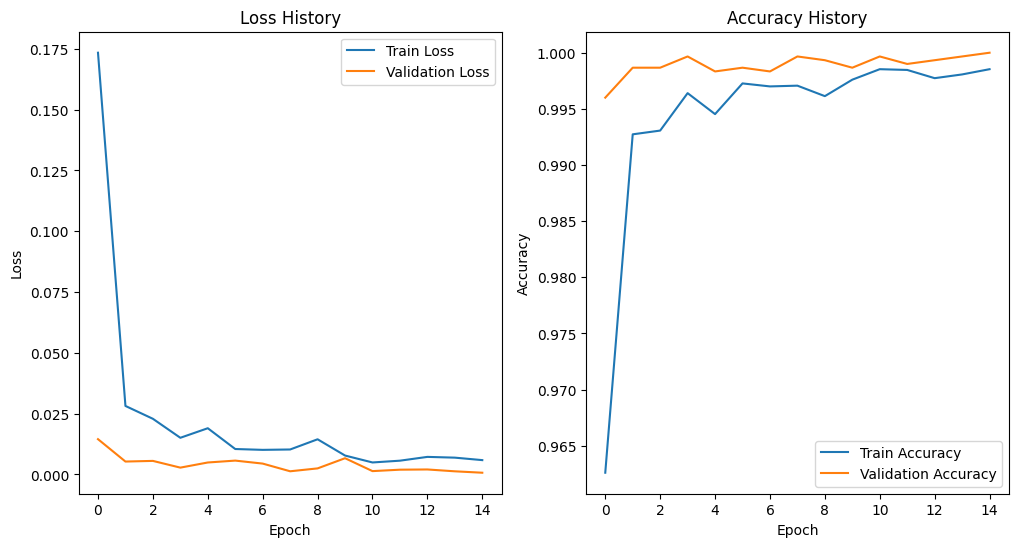

In [ ]:
# Function to plot training history
# This cell works only if standard training loop approach is used. e.g history variable
def plot_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy History')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


plot_history(history)

<h1 style="color: green;">4.3 - Model Evaluation and Misclassified Images Display</h1>

The code provided performs inference on a dataset using a newly trained model, visualizes the results through a confusion matrix, and displays images with incorrect predictions, along with their correct and incorrect labels. Here's a high-level summary:

1. **Custom Dataset Class**:
   - Extends the standard dataset class to include image file paths, facilitating tracking of misclassified images during inference.

2. **Loading the Test Dataset**:
   - Loads the test dataset using the validation folder and prepares it for inference.

3. **Display Misclassified Images Function**:
   - Identifies and displays misclassified images, showing the image along with its true and predicted labels.

4. **Evaluation and Confusion Matrix**:
   - Runs inference on the test dataset, collects predictions and true labels, and then generates a confusion matrix to visualize performance across different classes.
   - Displays a summary of misclassified images for qualitative analysis.


### Confusion Matrix
A confusion matrix is a table used to evaluate the performance of a classification model on a set of test data for which the true values are known. It cross-tabulates the actual class labels with the model's predictions, providing insights into correct and incorrect predictions across different classes, which helps in understanding the model's strengths and weaknesses in classifying each category.

This approach allows for a comprehensive evaluation of the model, both quantitatively through metrics like the confusion matrix and qualitatively by inspecting specific misclassifications.

<h2 style="color: green;">4.3.1 - Define Helper Functions</h2>

In [ ]:
# Define a custom dataset class that extends torchvision's ImageFolder to include image paths
class ImageFolderWithPaths(datasets.ImageFolder):
    def __getitem__(self, index):
        # Call the original method to get the image and label
        original_tuple = super().__getitem__(index)
        # Retrieve the path of the current image
        path = self.imgs[index][0]
        # Return the original tuple along with the path
        return original_tuple + (path,)

# Explanation of using the validation folder for testing
# Due to the specific structure of the dataset where test images are not organized in class directories,
# we use the validation set for testing. This requires a similar directory structure to training.
test_dataset = ImageFolderWithPaths(os.path.join(root_path, 'validation'), transform=val_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=3)

# Setting the device for computation to target device (e.g CUDA)
model.to(device)

# Function to display misclassified images
def display_misclassified_images(classes, all_labels, all_preds, all_paths, topk=None, names_only=False):
    # Filter out the misclassified images
    misclassified = [(path, true, pred) for path, true, pred in zip(all_paths, all_labels, all_preds) if true != pred]
    print(f"Total misclassified count: {len(misclassified)}")

    # Display or print paths of the top misclassified images based on the topk parameter
    for path, true, pred in misclassified[:topk]:
        if names_only == False:
            img = Image.open(path)
            plt.figure(figsize=(3, 3))
            plt.imshow(img)
            plt.title(f"Path: {path}\nTrue: {classes[true]}, Pred: {classes[pred]}")
            plt.axis('off')
            plt.show()
        else:
            print(f"Path: {path}\nTrue: {classes[true]}, Pred: {classes[pred]}")

# Evaluate on test set and plot confusion matrix
def evaluate_test_set(model, test_loader):
    all_preds = []
    all_labels = []
    all_paths = []

    # Set the model to evaluation mode
    model.eval()

    # Perform inference without computing gradients
    with torch.no_grad():
        data_bar = tqdm(test_loader, desc="Test", position=0, leave=True)
        for inputs, labels, paths in data_bar:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(labels.cpu().tolist())
            all_paths.extend(paths)

    # Compute the confusion matrix
    conf_mat = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix")
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Display misclassified images after the evaluation
    display_misclassified_images(test_loader.dataset.classes, all_labels, all_preds, all_paths, topk=5, names_only=False)

<h2 style="color: green;">4.3.2 - Run Evaluation</h2>

Test: 100%|█████████████████████████████████████████████████████████████████████████████| 94/94 [00:06<00:00, 14.17it/s]


Confusion Matrix


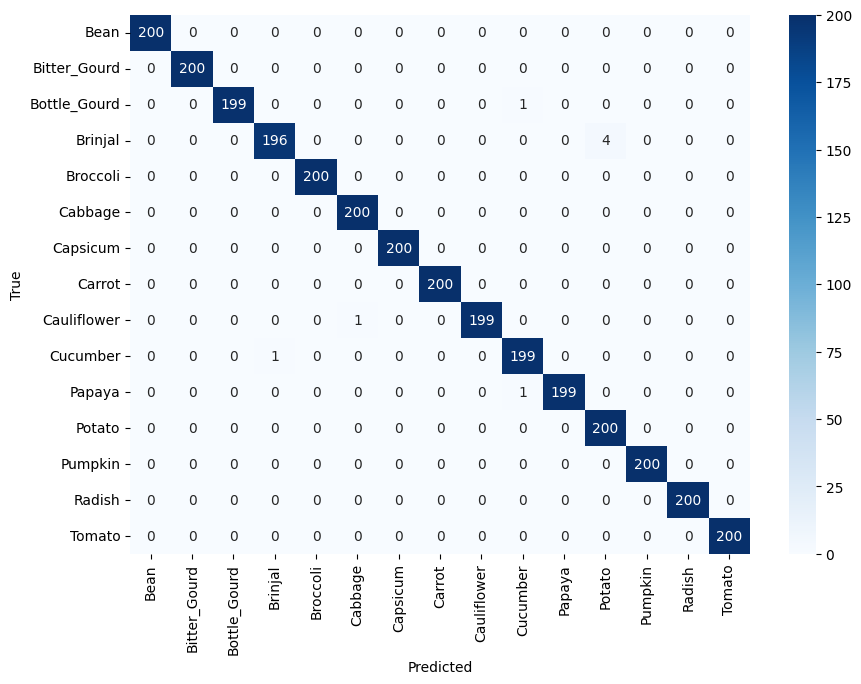

Total misclassified count: 8


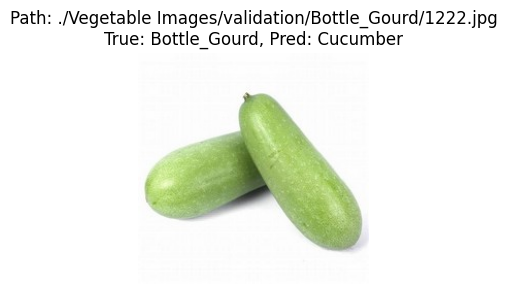

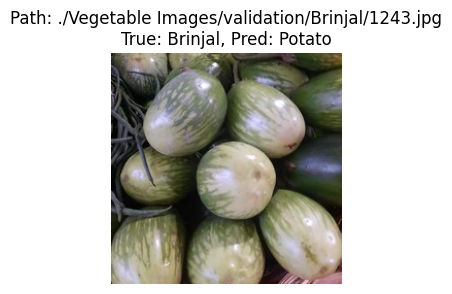

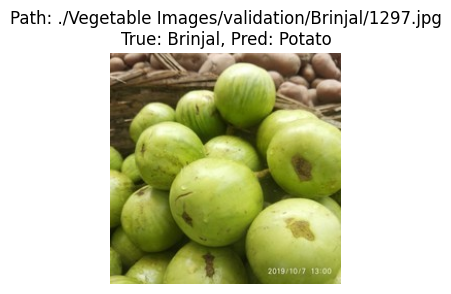

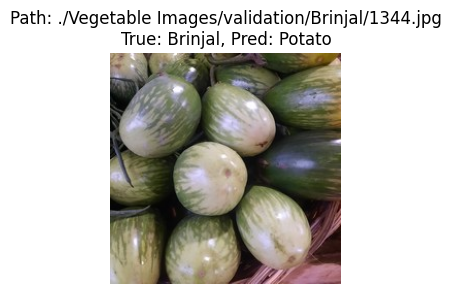

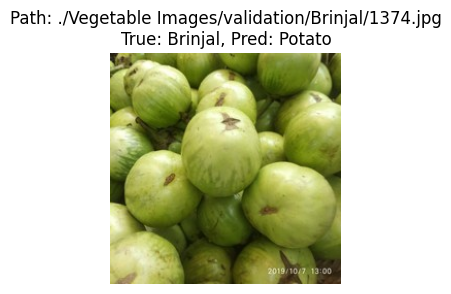

In [ ]:
# Call the evaluate function to start the test evaluation
evaluate_test_set(model, test_loader)

## Inferencing a single image

In [ ]:
model.eval()
# Define the image transformation pipeline
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# Load and preprocess the image
image_path = './Vegetable Images/train/Capsicum/0043.jpg'
image = Image.open(image_path)
image = val_transforms(image).to(device)
image = image.unsqueeze(0)
# Perform the classification
with torch.no_grad():
    outputs = model(image)
# Get the predicted class labels
_, predicted_idx = torch.max(outputs, 1)
predicted_label = predicted_idx.item()
# Print the predicted label
print(predicted_label)

<h1 style="color: green;">5.0 - Saving & Loading Models</h1>

<h2 style="color: green;">5.1 - Saving Models</h2>

In [ ]:
import torch

# Save the entire model
torch.save(model, 'model_entire.pth')

<h2 style="color: green;">5.2 - Loading  Models</h2>

In [ ]:
# Load the entire model
model = torch.load('model_entire.pth')

print("Model loaded.")